In [ ]:
import os
#PROJECT ABANDONED AS P VALUE IS TOO HIGH TO PERFORM THIS
# P = 0.95 :/, TIME TO FIND SOMETHING NEW
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose
cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))

print ("os.getcwd() returns an object of type {0}".format(type(cwd)))

# copy the filepath 
os.chdir ("D:\Power BI thing\Forage Data sets\JPMC Data analyst")
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from datetime import date,timedelta


df = pd.read_csv('At_Gas.csv', parse_dates=['Dates'])
prices = df['Prices'].values
dates = df['Dates'].values

#Convert date to datetimeformat and set as index
df['Dates'] = pd.to_datetime(df['Dates'], infer_datetime_format=True)
df = df.set_index(['Dates'])

df['Prices_diff'] = df['Prices'].diff(periods=12)


df['Prices_diff'].fillna(method='backfill', inplace=True)
df.info()
prices_diff = df['Prices_diff'].values
print(prices_diff)
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(prices)
# fig, ax = plt.subplots()
# ax.plot_date(dates, prices, '-')
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# ax.set_title('Natural Gas Prices')
# ax.tick_params(axis='x', rotation=60)

Current working directory: D:\Power BI thing\Forage Data sets\JPMC Data analyst
os.getcwd() returns an object of type <class 'str'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prices       48 non-null     float64
 1   Prices_diff  48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.9   0.4   0.6   0.9   0.6   0.3   0.86  0.4   0.4   0.1   0.6
  0.9   0.4   0.2   0.6  -0.1   0.5   0.8   0.5   0.5   0.9   0.7   0.7
  0.8   0.6   1.2   0.5   0.7   0.7   0.6   0.2   0.6   0.2   0.4   0.3 ]
ADF Statistic: 0.21807686170000193
p-value: 0.9732574388448694
Non-Stationary


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_31584\1413820585.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('At_Gas.csv', parse_dates=['Dates'])
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_31584\1413820585.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Dates'] = pd.to_datetime(df['Dates'], infer_datetime_format=True)
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_31584\1413820585.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 

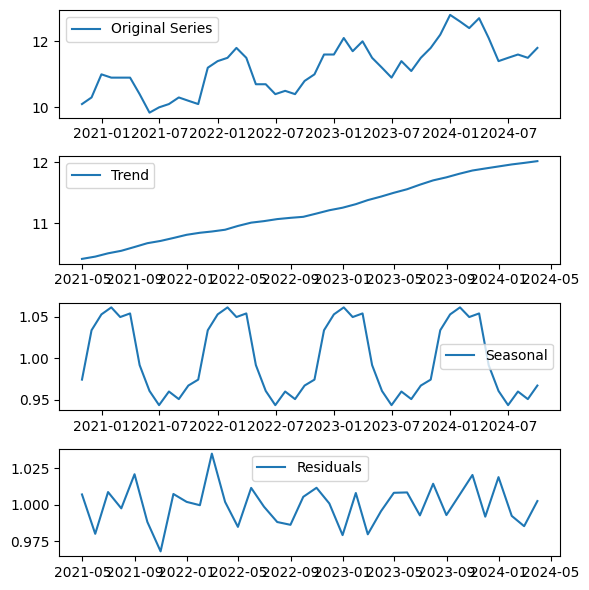

In [ ]:
#IDENTIFYING and removing the SEASONAL COMPONENTS
result = seasonal_decompose(df['Prices'], model='multiplicative', period=12)
# In this case the magnitude scales with time series
# Additive Decomposition:

#     In additive decomposition, the time series is expressed as the sum of its components:Y(t)=Trend(t)+Seasonal(t)+Residual(t)Y(t)=Trend(t)+Seasonal(t)+Residual(t)
#     It's suitable when the magnitude of seasonality doesn't vary with the magnitude of the time series.

# Multiplicative Decomposition:

#     In multiplicative decomposition, the time series is expressed as the product of its components: Y(t)=Trend(t)∗Seasonal(t)∗Residual(t)Y(t)=Trend(t)∗Seasonal(t)∗Residual(t)
#     It's suitable when the magnitude of seasonality scales with the magnitude of the time series.
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

#Decomposing individual components and tracking
# Plot the decomposed components
plt.figure(figsize=(6,6))

#subplot chote plot banata hai,1 image me 4 graph ban sakte
# think of small rectangles with L*B (4,1) in a big rectangle of (4,4)
plt.subplot(4, 1, 1)
plt.plot(df['Prices'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
#Trend component shows that magnitude of Prices increases with time
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df['month_index'] = df.index.month

SARIMAX_model = pm.auto_arima(df[['Prices']], exogenous=df[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)


NameError: name 'pm' is not defined